<a href="https://colab.research.google.com/github/saeidsaadatigero/AI_ML_Computer-Vision/blob/main/25_Decision_Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        46
         1.0       0.95      0.95      0.95        44

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90

Confusion Matrix:
 [[44  2]
 [ 2 42]]


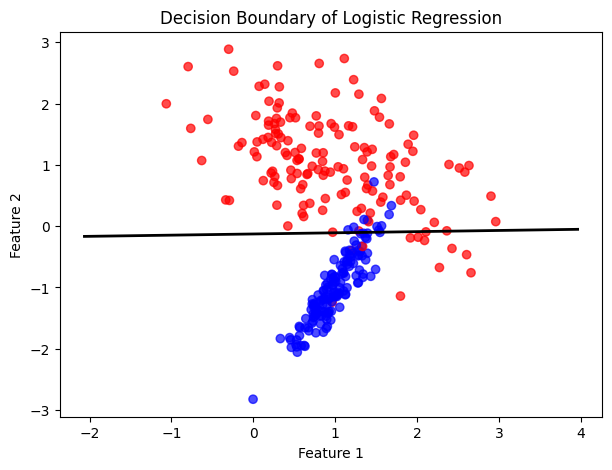

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# ۱. تولید داده مصنوعی دوبعدی
X, y = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تبدیل به تنسور
X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.FloatTensor(y_train).view(-1, 1)
X_test_t = torch.FloatTensor(X_test)
y_test_t = torch.FloatTensor(y_test).view(-1, 1)

# ۲. مدل لجستیک
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# ۳. آموزش
for epoch in range(200):
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

# ۴. پیش‌بینی و ارزیابی
with torch.no_grad():
    y_pred = model(X_test_t)
    y_pred_class = (y_pred >= 0.5).float()

print(classification_report(y_test_t, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test_t, y_pred_class))

# ۵. رسم Decision Boundary
w = model.linear.weight[0].detach().numpy()
b = model.linear.bias.item()

x_points = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
y_points = -(w[0]*x_points + b)/w[1]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.7)
plt.plot(x_points, y_points, color='black', linewidth=2)
plt.title("Decision Boundary of Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()